# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

In [16]:
#create lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [18]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#for loop for city name in cities list
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | otane
Processing Record 4 of Set 1 | taltal
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | tautira
Processing Record 7 of Set 1 | jacareacanga
Processing Record 8 of Set 1 | padang
City not found. Skipping...
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | naze
Processing Record 13 of Set 1 | fortuna
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | zhaotong
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | cabo san lucas
City not found. Skipping...
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | e

Processing Record 35 of Set 4 | acarau
Processing Record 36 of Set 4 | ecoporanga
Processing Record 37 of Set 4 | quesnel
Processing Record 38 of Set 4 | estelle
Processing Record 39 of Set 4 | severo-kurilsk
City not found. Skipping...
Processing Record 40 of Set 4 | yerbogachen
Processing Record 41 of Set 4 | magadan
Processing Record 42 of Set 4 | chimbote
Processing Record 43 of Set 4 | ola
Processing Record 44 of Set 4 | tabas
Processing Record 45 of Set 4 | itarema
Processing Record 46 of Set 4 | olafsvik
Processing Record 47 of Set 4 | nanortalik
Processing Record 48 of Set 4 | bejar
Processing Record 49 of Set 4 | skjervoy
Processing Record 50 of Set 4 | oros
Processing Record 0 of Set 5 | coquimbo
City not found. Skipping...
Processing Record 1 of Set 5 | forio
Processing Record 2 of Set 5 | gazanjyk
Processing Record 3 of Set 5 | haines junction
Processing Record 4 of Set 5 | bambanglipuro
Processing Record 5 of Set 5 | mahibadhoo
Processing Record 6 of Set 5 | solvychegodsk


Processing Record 23 of Set 8 | grand gaube
City not found. Skipping...
Processing Record 24 of Set 8 | aksarka
Processing Record 25 of Set 8 | tiksi
Processing Record 26 of Set 8 | sangueya
Processing Record 27 of Set 8 | dunedin
Processing Record 28 of Set 8 | wanning
Processing Record 29 of Set 8 | timbiqui
Processing Record 30 of Set 8 | atambua
Processing Record 31 of Set 8 | kolpashevo
Processing Record 32 of Set 8 | kamenka
City not found. Skipping...
Processing Record 33 of Set 8 | marzuq
City not found. Skipping...
Processing Record 34 of Set 8 | broken hill
City not found. Skipping...
Processing Record 35 of Set 8 | inirida
Processing Record 36 of Set 8 | bathsheba
Processing Record 37 of Set 8 | fuyang
Processing Record 38 of Set 8 | iskateley
Processing Record 39 of Set 8 | yatou
Processing Record 40 of Set 8 | pitsunda
Processing Record 41 of Set 8 | bubanza
Processing Record 42 of Set 8 | collinsville
Processing Record 43 of Set 8 | lumeje
Processing Record 44 of Set 8 | 

Processing Record 0 of Set 12 | port hardy
Processing Record 1 of Set 12 | pangody
Processing Record 2 of Set 12 | wencheng
Processing Record 3 of Set 12 | ugep
City not found. Skipping...
Processing Record 4 of Set 12 | perth
Processing Record 5 of Set 12 | farim
City not found. Skipping...
Processing Record 6 of Set 12 | viedma
Processing Record 7 of Set 12 | tullamore
Processing Record 8 of Set 12 | belyy yar
Processing Record 9 of Set 12 | sur
Processing Record 10 of Set 12 | kungurtug
Processing Record 11 of Set 12 | beboto
Processing Record 12 of Set 12 | kang
City not found. Skipping...
Processing Record 13 of Set 12 | alofi
Processing Record 14 of Set 12 | teguise
Processing Record 15 of Set 12 | katsuura
Processing Record 16 of Set 12 | hamilton
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
#pandas df from data retrieved 
weather_dict = pd.DataFrame({"City": city_name, 
                            "Lat": lat_list, 
                            "Lng": lng_list, 
                            "Max Temp": max_temp_list, 
                            "Humidity": humidity, 
                            "Cloudiness": cloudiness, 
                             "Wind Speed": wind_speed_list,
                             "Country": country, 
                             "Date": date})
weather_dict.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [21]:
#print df 
weather_dict 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,53.71,47,40,32.21,CL,1643579868
1,Mataura,-46.1927,168.8643,68.49,68,48,0.47,NZ,1643580059
2,Otane,-39.8833,176.6333,68.38,60,100,3.98,NZ,1643580059
3,Taltal,-25.4000,-70.4833,67.98,72,29,7.43,CL,1643579989
4,Ribeira Grande,38.5167,-28.7000,59.13,73,47,26.37,PT,1643580060
...,...,...,...,...,...,...,...,...,...
572,Kang,-23.6752,22.7876,68.83,82,99,14.12,BW,1643580433
573,Alofi,-19.0595,-169.9187,73.87,87,100,8.57,NU,1643580435
574,Teguise,29.0605,-13.5640,62.82,39,0,9.22,ES,1643580435
575,Katsuura,35.1333,140.3000,38.19,52,100,11.48,JP,1643580436


In [32]:
# Save city data into a csv file
weather_dict.to_csv("output_data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

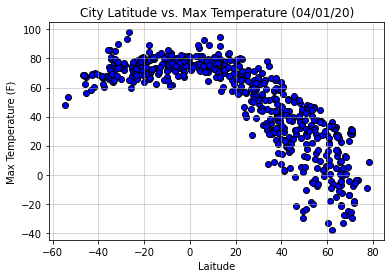

In [33]:
# Create Latitude vs. Max Temp scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (04/01/20)")

# x axis label
plt.xlabel("Laitude")

# y axis label
plt.ylabel("Max Temperature (F)")

# add grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("output_data/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

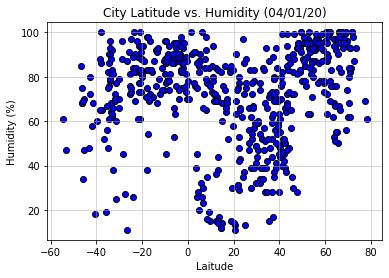

In [34]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (04/01/20)")

# x axis label
plt.xlabel("Laitude")

# y axis label
plt.ylabel("Humidity (%)")

# add grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("output_data/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

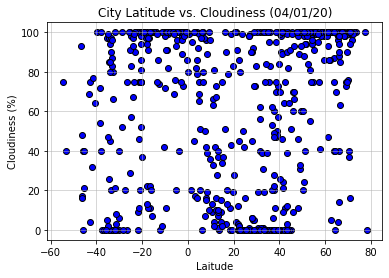

In [36]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (04/01/20)")

# x axis label
plt.xlabel("Laitude")

# y axis label
plt.ylabel("Cloudiness (%)")

# y axis limit
plt.ylim(-5,105)

# add grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("output_data/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

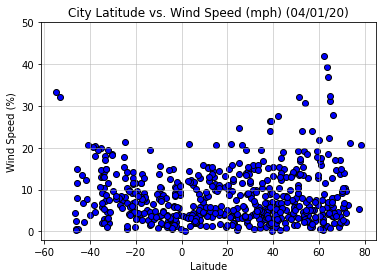

In [38]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "blue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (04/01/20)")

# x axis label
plt.xlabel("Laitude")

# y axis label
plt.ylabel("Wind Speed (%)")

# y axis limit
plt.ylim(-2,50)

# add grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("output_data/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [39]:
# make Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [40]:
# Define function for linear regression and scatter plot
def linear_regression(x,y):
    print(f"The r-value is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-value is : -0.84


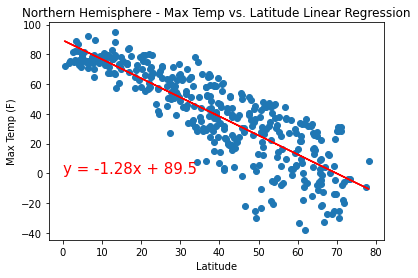

In [41]:
# Call function 
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# function 2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# xlabel
plt.xlabel("Latitude")

# ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

# There is a negative correlation between the Max Temp and latitude for the Northern Hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.4


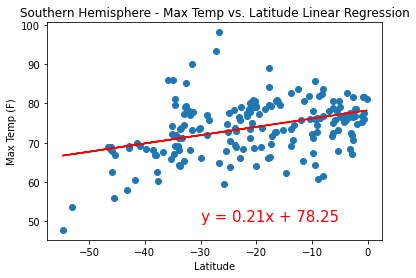

In [42]:
# Call function 
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# function 2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# xlabel
plt.xlabel("Latitude")

# ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

In [ ]:
#There is a positive correlation between the Max Temp and latitude for the Southern Hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.43


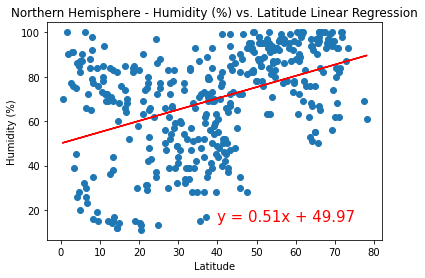

In [43]:
# Call a function
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# function 2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# xlabel
plt.xlabel("Latitude")

# ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

In [ ]:
#There is a positive correlation between Humidity and Latitude for the Northern Hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.39


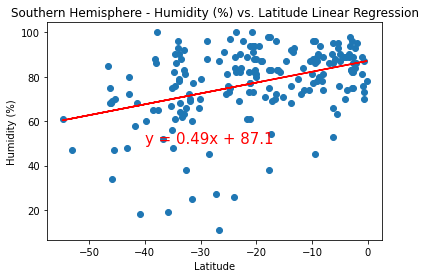

In [44]:
# Call a function
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# function 2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# xlabel
plt.xlabel("Latitude")

# ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

In [ ]:
#There is a positive correlation between Humidity and latitude in the Southern Hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.38


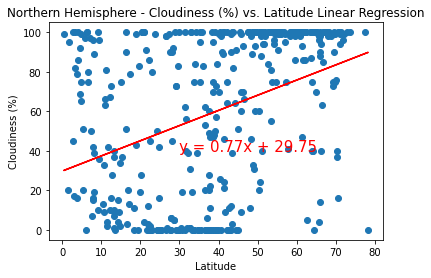

In [45]:
# Call a function
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# function 2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# xlabel
plt.xlabel("Latitude")

# ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

In [46]:
#There is a weak positive correlation between Cloudiness and latitude in the Northern Hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.46


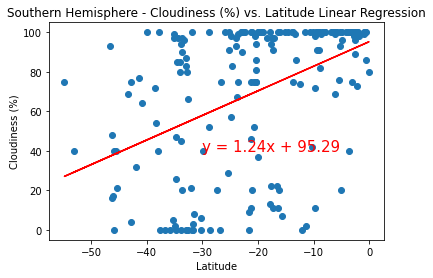

In [47]:
# Call a function
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# function 2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# xlabel
plt.xlabel("Latitude")

# ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

In [ ]:
#There is a positive correlation between Cloudiness and latitude in the Southern Hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.12


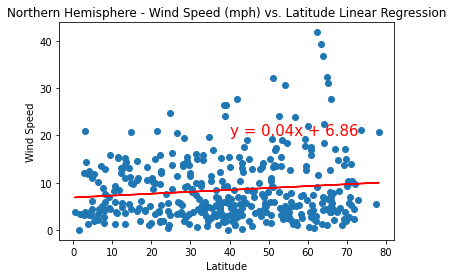

In [49]:
# Call a function
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# function 2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# xlabel
plt.xlabel("Latitude")

# ylabel
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

In [50]:
#There is a weak positive correlation between Windspeed and latitude for the Northern Hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.36


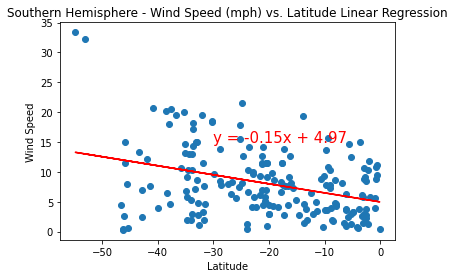

In [51]:
# Call a function
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# function 2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# xlabel
plt.xlabel("Latitude")

# ylabel
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

In [ ]:
#There is a weak negative correlation between Wind speed and latitude in the Southern Hemisphere. 